# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Fadiah Khairina
- Email: fafazizi726@student.uns.ac.id
- Id Dicoding: fadiahkhairina

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren pergerakan penjualan sepeda per harinya?
- Pertanyaan 2: Bagaimana jumlah peminjaman sepeda per musim?
- Pertanyaan 3: Bagaimana jumlah peminjaman sepeda per bulan pada tahun 2011 dan tahun 2012?
- Pertanyaan 4: Bagaimana pengaruh suhu, kelembapan udara dan kecepatan angin terhadap jumlah peminjaman?
- Pertanyaan 5: Apakah ada pola peminjaman sepeda yang berbeda pada hari kerja (workingday) dan hari libur (holiday) pada setiap jam?

## Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df=pd.read_csv('/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day_df

In [ ]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [ ]:
#duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat data

In [ ]:
#ringkasan parameter statistika
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [ ]:
#duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikat data

In [ ]:
#ringkasan parameter statistika
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

mengubah format datatime data dteday pada data day_df

In [ ]:
datetime_columns_day = ["dteday"]

for column in datetime_columns_day:
  day_df[column] = pd.to_datetime(day_df[column])

mengubah format datatime data dteday pada data hour_df

In [ ]:
datetime_columns_hour = ["dteday"]

for column in datetime_columns_hour:
  hour_df[column] = pd.to_datetime(hour_df[column])

menampilkan data dteday pada data day_df yang sudah diubah ke format datatime

In [ ]:
day_df[column]

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

menampilkan mdata dteday pada data hour_df yang sudah diubah ke format datatime

In [ ]:
hour_df[column]

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
day_df.describe(include="all")


<ipython-input-18-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000




*   Jumlah data ada 731
*   Data dari tanggal 1 Januari 2011-31 desember 2012
*   Nilai rata-rata peminjaman sepeda 4504
*   Minimum peminjaman sepeda 22
*   Maksimum peminjaman sepedA 8714










histogram setiap kolom data pada day_df

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

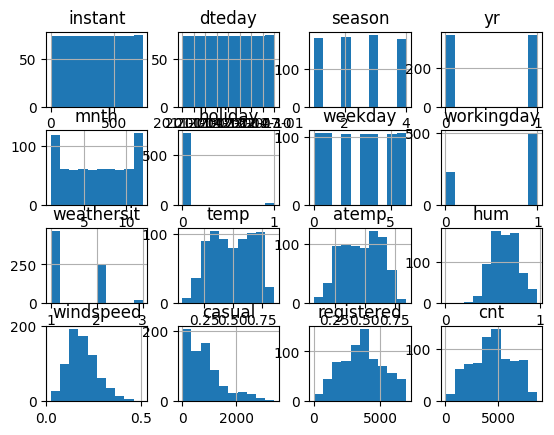

In [ ]:
day_df.hist()

Berdasarkan plot tersebut, dapat dilihat bahwa data pada setiap kolom data memiliki distribusi right-skewed.

In [ ]:
day_df.corr()

<ipython-input-20-2760edc27d1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_df.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


pada seoson dan month memiliki korelasi yang baik, temp dan atemp memiliki korelasi yang baik,

In [ ]:
peminjaman_per_hari = day_df.groupby('dteday')['cnt'].sum().reset_index()
peminjaman_per_hari

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


Terlihat bahwa tabel menampilkan spesifikasi jumlah peminjaman per hari

In [ ]:
day_df.groupby(by='season').agg({
    'cnt': ['sum', 'mean','max', 'min'],
    'registered' :['sum', 'mean', 'max', 'min']
})

cnt                          registered                        
            sum         mean   max   min        sum         mean   max  min
season                                                                     
1        471348  2604.132597  7836   431     410726  2269.204420  5315  416
2        918589  4992.331522  8362   795     715067  3886.233696  6456  674
3       1061129  5644.303191  8714  1115     835038  4441.691489  6917  889
4        841613  4728.162921  8555    22     711831  3999.050562  6946   20

jumlah peminjaman dan register paling banyak pada season 3

In [ ]:
day_df.groupby(by='temp').agg({
    'cnt': ['sum', 'mean','max', 'min'],
    'registered' :['sum', 'mean', 'max', 'min']
})

cnt                     registered                    
           sum    mean   max   min        sum    mean   max   min
temp                                                             
0.059130   981   981.0   981   981        888   888.0   888   888
0.096522   986   986.0   986   986        836   836.0   836   836
0.097391  1416  1416.0  1416  1416       1330  1330.0  1330  1330
0.107500  2368  2368.0  2368  2368       2273  2273.0  2273  2273
0.127500  1529  1529.0  1529  1529       1456  1456.0  1456  1456
...        ...     ...   ...   ...        ...     ...   ...   ...
0.834167  5463  5463.0  5463  5463       4634  4634.0  4634  4634
0.838333  3846  3846.0  3846  3846       3176  3176.0  3176  3176
0.848333  3387  3387.0  3387  3387       2825  2825.0  2825  2825
0.849167  3285  3285.0  3285  3285       2298  2298.0  2298  2298
0.861667  4840  4840.0  4840  4840       3392  3392.0  3392  3392

[499 rows x 8 columns]

setiap suhu yang memiliki nilai yang hampir sama, jumlah peminjam sepeda juga hampir sama

In [ ]:
day_df.groupby(by='windspeed').agg({
    'cnt': ['sum', 'mean','max', 'min'],
    'registered' :['sum', 'mean', 'max', 'min']
})

cnt                     registered                    
            sum    mean   max   min        sum    mean   max   min
windspeed                                                         
0.022392   4985  4985.0  4985  4985       4036  4036.0  4036  4036
0.042304   5117  5117.0  5117  5117       3603  3603.0  3603  3603
0.045404   5409  5409.0  5409  5409       3174  3174.0  3174  3174
0.045408   1712  1712.0  1712  1712       1592  1592.0  1592  1592
0.046650   5087  5087.0  5087  5087       4750  4750.0  4750  4750
...         ...     ...   ...   ...        ...     ...   ...   ...
0.417908   1913  1913.0  1913  1913       1705  1705.0  1705  1705
0.421642   2732  2732.0  2732  2732       2415  2415.0  2415  2415
0.422275   4195  4195.0  4195  4195       3724  3724.0  3724  3724
0.441563   5382  5382.0  5382  5382       4896  4896.0  4896  4896
0.507463   1635  1635.0  1635  1635       1103  1103.0  1103  1103

[650 rows x 8 columns]

Semakin tinggi kecepatan angin semakin rendah jumlah peminjam sepeda

In [ ]:
# menghitung jumlah peminjaman (cnt) per bulan
jumlah_peminjaman_per_musim = day_df.groupby('mnth')['cnt'].sum().reset_index()
print(jumlah_peminjaman_per_musim)

    mnth     cnt
0      1  134933
1      2  151352
2      3  228920
3      4  269094
4      5  331686
5      6  346342
6      7  344948
7      8  351194
8      9  345991
9     10  322352
10    11  254831
11    12  211036


jumlah terbanyak peminjam sepeda pada bulan agustus

### Explore hour_df

In [ ]:
hour_df.describe(include="all")

<ipython-input-27-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


*   Jumlah data ada 17379
*   Data dari tanggal 1 Januari 2011-31 desember 2012
*   Nilai rata-rata peminjaman sepeda Per jamnya 189
*   Minimum peminjaman sepeda 1
*   Maksimum peminjaman sepeda 977


In [ ]:
pola_peminjaman_per_jam = hour_df.groupby(['hr', 'workingday', 'holiday'])['cnt'].mean().reset_index()
pola_peminjaman_per_jam

,hr,workingday,holiday,cnt
0,0,0,0,94.148325
1,0,0,1,57.476190
2,0,1,0,36.786290
3,1,0,0,72.583732
4,1,0,1,38.904762
...,...,...,...,...
67,22,0,1,108.857143
68,22,1,0,138.389558
69,23,0,0,88.746411
70,23,0,1,57.904762


Terlihat bahwa tabel menampilkan spesifikasi jumlah peminjaman pada hari kerja dan hari libur per jamnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren pergerakan penjualan sepeda per harinya?

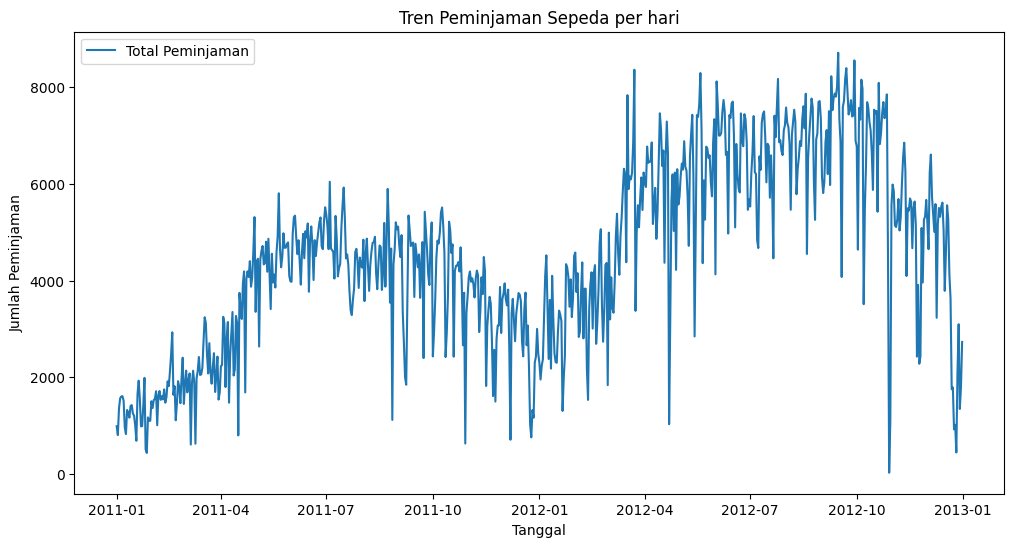

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total Peminjaman')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Peminjaman Sepeda per hari')
plt.legend()
plt.show()

Berdasarkan grafik diatas tren peminjaman sepeda mengalami flukuasi, setiap awal tahun akan mengalami kenaikan setelah itu pada akhir tahun akan mengalami penurunan

### Pertanyaan 2: Bagaimana jumlah peminjaman sepeda per musim?

In [ ]:
peminjaman_per_musim = day_df.groupby('season')['cnt'].sum().reset_index()
colors = ['lightcoral', 'gold', 'lightblue', 'lightgreen']

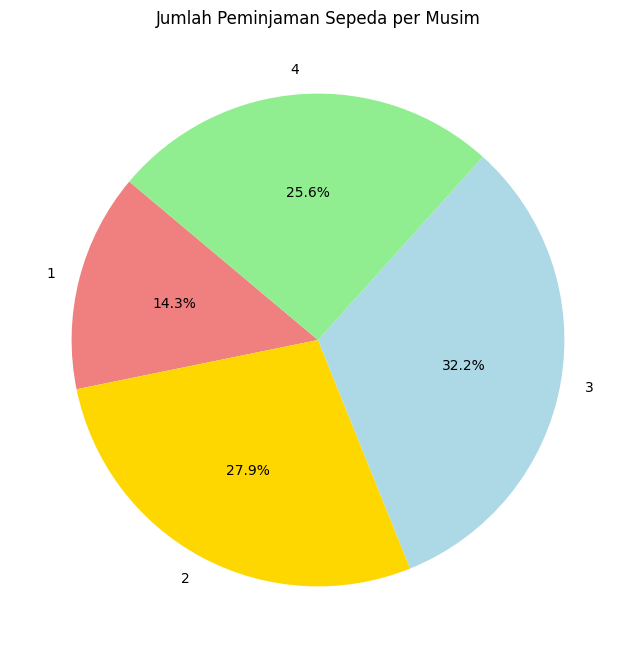

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(peminjaman_per_musim['cnt'], labels=peminjaman_per_musim['season'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Peminjaman Sepeda per Musim')
plt.show()

Berdasarkan pie chart penjumlahan sepeda per musim dapat dilihat bahwa peminjaman sepeda terbanyak pada musim ke 3 dengan persentase 32,2 % dan peminjaman sepeda paling sedikit pada musim ke 1 dengan persentase 14,3 %

###Pertanyaan 3: Bagaimana jumlah peminjaman sepeda per bulan pada tahun 2011 dan tahun 2012?

In [ ]:
day_df['year'] = day_df['dteday'].dt.year
day_df_2011_2012 = day_df[day_df['year'].isin([2011, 2012])]

In [ ]:
peminjaman_per_bulan = day_df_2011_2012.groupby(['year', 'mnth'])['cnt'].sum().reset_index()

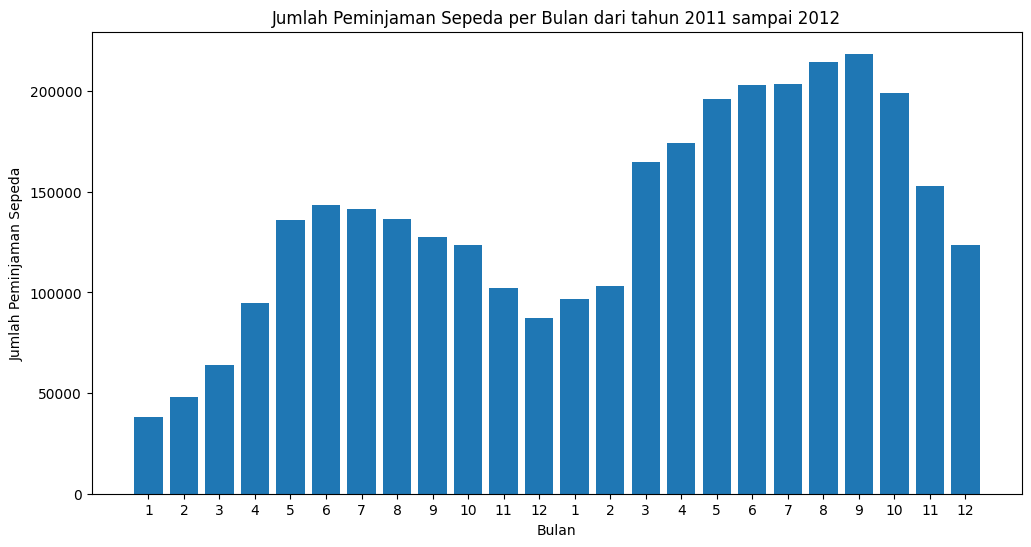

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(peminjaman_per_bulan.index, peminjaman_per_bulan['cnt'])
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda per Bulan dari tahun 2011 sampai 2012')
plt.xticks(peminjaman_per_bulan.index, peminjaman_per_bulan['mnth'])
plt.show()

Berdasarkan bar chart diatas terlihat bahwa peminjaman sepeda paling banyak pada tahun 2011 yaitu bulan juni dan peminjaman sepeda paling sedikit pada tahun 2011 yaitu bulan januari. Pada tahun 2012, peminjaman sepeda paling banyak yaitu bulan september dan peminjaman sepeda paling sedikit yaitu januari.

### Pertanyaan 4: Bagaimana pengaruh suhu, kelembapan udara dan kecepatan angin terhadap jumlah peminjaman?

Clustering Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        dteday      temp       hum  windspeed  cluster
0   2011-01-01  0.344167  0.805833   0.160446        0
1   2011-01-02  0.363478  0.696087   0.248539        0
2   2011-01-03  0.196364  0.437273   0.248309        2
3   2011-01-04  0.200000  0.590435   0.160296        2
4   2011-01-05  0.226957  0.436957   0.186900        2
..         ...       ...       ...        ...      ...
726 2012-12-27  0.254167  0.652917   0.350133        2
727 2012-12-28  0.253333  0.590000   0.155471        2
728 2012-12-29  0.253333  0.752917   0.124383        0
729 2012-12-30  0.255833  0.483333   0.350754        2
730 2012-12-31  0.215833  0.577500   0.154846        2

[731 rows x 5 columns]


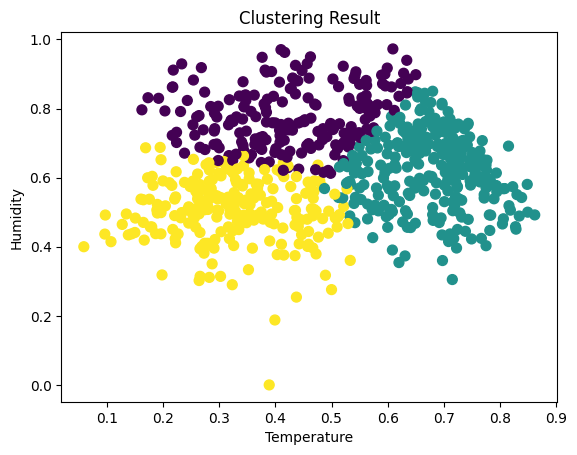

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pilih variabel untuk clustering
features = ['temp', 'hum', 'windspeed']

# Menentukan jumlah cluster yang diinginkan
n_clusters = 3

# Memilih data yang akan digunakan untuk clustering
X = day_df[features]

# Melakukan proses clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
day_df['cluster'] = kmeans.fit_predict(X)

# Menampilkan hasil clustering
print(day_df[['dteday', 'temp', 'hum', 'windspeed', 'cluster']])

# Visualisasi hasil clustering
plt.scatter(X['temp'], X['hum'], c=day_df['cluster'], cmap='viridis', s=50)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Clustering Result')
plt.show()



Berdasarkan gambar diatas diperoleh clustering dibagi menjadi 3 dnegna warna yang berbeda.

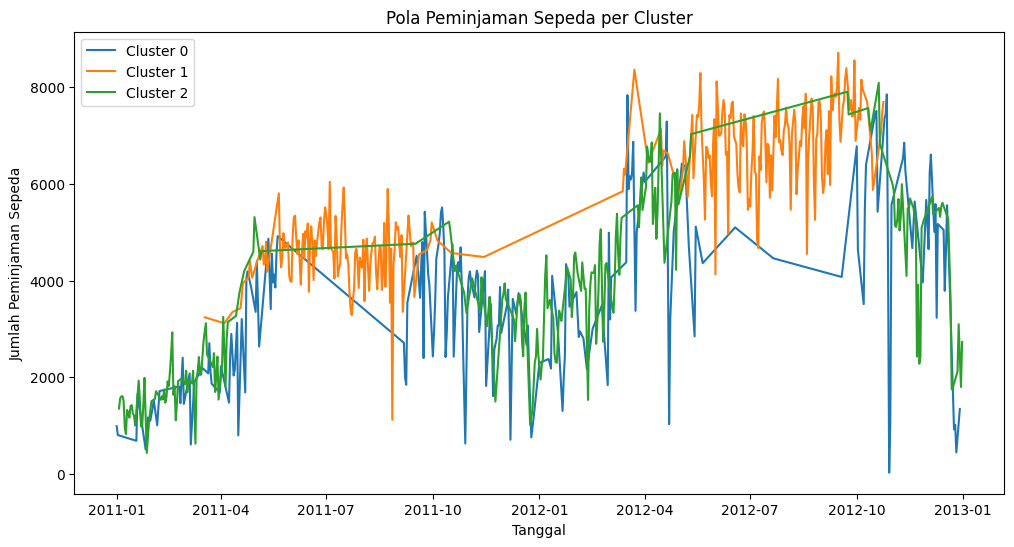

In [ ]:
# Hitung jumlah peminjaman sepeda harian per cluster
peminjaman_per_cluster = day_df.groupby(['dteday', 'cluster'])['cnt'].sum().reset_index()

# Visualisasi pola peminjaman sepeda per cluster
plt.figure(figsize=(12, 6))
for cluster in range(n_clusters):
    cluster_data = peminjaman_per_cluster[peminjaman_per_cluster['cluster'] == cluster]
    plt.plot(cluster_data['dteday'], cluster_data['cnt'], label=f'Cluster {cluster}')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Pola Peminjaman Sepeda per Cluster')
plt.legend()
plt.show()

In [ ]:
# Analisis perbedaan karakteristik antar cluster
cluster_summary = day_df.groupby('cluster')[['temp', 'hum', 'windspeed', 'cnt']].mean().reset_index()
print(cluster_summary)

   cluster      temp       hum  windspeed          cnt
0        0  0.427127  0.777347   0.170806  3663.813725
1        1  0.679157  0.621023   0.177687  5813.767918
2        2  0.324784  0.506205   0.223670  3597.551282


Berdasarkan hasil clustering yang telah dilakukan dapat disimpulkan bahwa suhu, kelembapan udara, dan kecepatan angin dapat mempengaruhi jumlah peminjaman sepeda. Semakin tinggi suhu, kelembapan sedang dan kecepatan angin rendah maka jumlah peminjam sepeda akan tinggi.

### Pertanyaan 5: Apakah ada pola peminjaman sepeda yang berbeda pada hari kerja (workingday) dan hari libur (holiday) pada setiap jam?

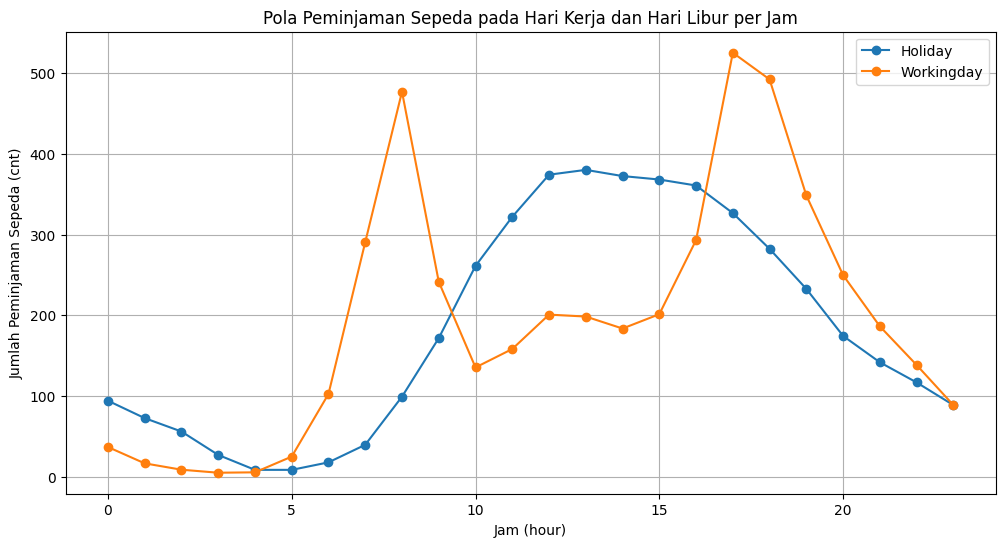

In [ ]:
# Membuat line chart
plt.figure(figsize=(12, 6))
for i in range(2):  # Loop untuk workingday dan holiday
    subset = pola_peminjaman_per_jam[pola_peminjaman_per_jam['workingday'] == i]
    label = 'Workingday' if i == 1 else 'Holiday'
    plt.plot(subset[subset['holiday'] == 0]['hr'], subset[subset['holiday'] == 0]['cnt'], label=label, marker='o')

plt.title('Pola Peminjaman Sepeda pada Hari Kerja dan Hari Libur per Jam')
plt.xlabel('Jam (hour)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan pola diatas, pola peminjaman sepeda pada hari kerja (workingday) dan hari libur (holiday) pada setiap jam memiliki perbedaan jam orang yang paling banyak meminjam sepeda pada holiday saat jam 12 dan paling sedikit yang meminjam sepeda pada holiday saat jam 5. Sedangakan jam orang yang paling banyak meminjam sepeda pada working day saat jam 17 kemudian disusul jam 8 dan paling sedikit yang meminjam sepeda pada holiday saat jam 3.

## Conclusion

- Setiap harinya peminjaman sepeda mengalami fluktuasi.
- Peminjaman sepeda terbanyak pada musim ke 3 dengan persentase 32,2 % dan peminjaman sepeda paling sedikit pada musim ke 1 dengan persentase 14,3 %
- Peminjaman sepeda berdasarkan bulan pada tahun 2011 dan 2012 memiliki perbedaan pada bulan yang paling banyak orang meminjam sepeda, pada tahun 2011 paling banyak bulan juni sedangkan tahun 2012 paling banyak bulan september. Pada bulan januari tahun 2011 dan 2012 peminat peminjaman sepeda paling sedikit.
- Suhu, kelembapan udara, dan kecepatan angin dapat mempengaruhi jumlah peminjaman sepeda. Semakin tinggi suhu, kelembapan sedang dan kecepatan angin rendah maka jumlah peminjam sepeda akan tinggi.
- Jam orang yang paling banyak meminjam sepeda pada holiday saat jam 12 dan paling sedikit yang meminjam sepeda pada holiday saat jam 5. Sedangakan jam orang yang paling banyak meminjam sepeda pada working day saat jam 17 kemudian disusul jam 8 dan paling sedikit yang meminjam sepeda pada holiday saat jam 3.